In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 6
fig_height = 4
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/hirofumi48/162348.github.io/posts/2024/Kernels':
  os.chdir(r'/Users/hirofumi48/162348.github.io/posts/2024/Kernels')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/importlib/_bootstrap_external.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/zipimport.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/codecs.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/aliases.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/__init__.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/encodings/utf_8.py": 1717698404.0, "/opt/homebrew/Cellar/python@3.12/3.12.4/Frameworks/Python.

/var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_9031/2432452017.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
import numpy as np

N = 10

np.random.seed(1234)

x = np.random.randn(N,1) * 0.8

y = np.sin(3*x) + np.random.randn(N,1) * 0.09

xs = np.linspace(-3,3,61).reshape(-1,1)

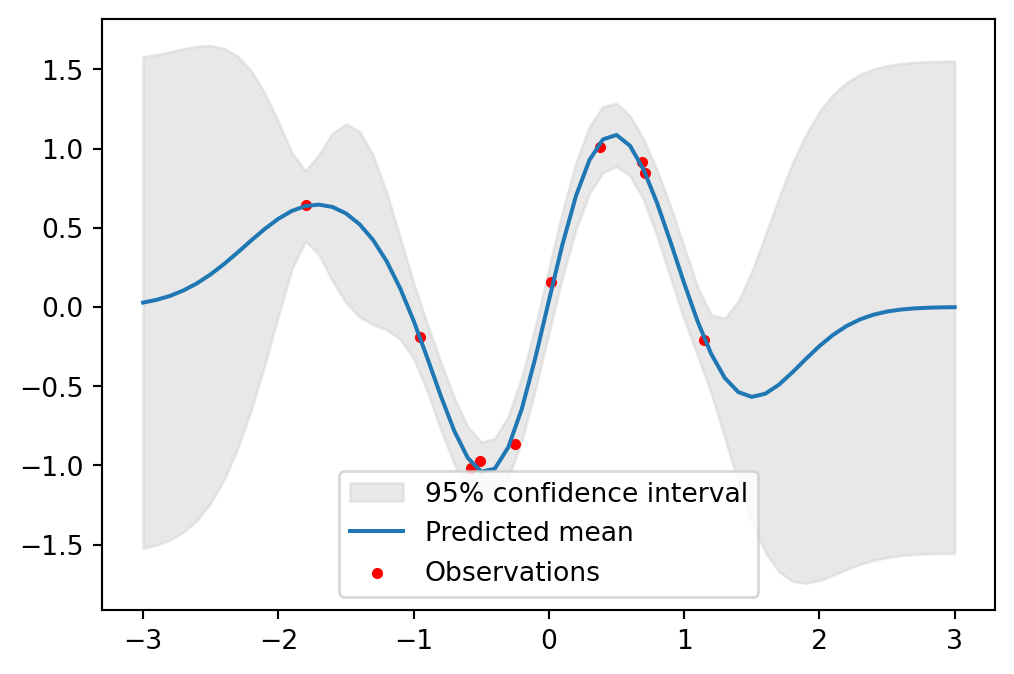

In [3]:
import GPy
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(input_dim=1, variance=1.0)
model = GPy.models.GPRegression(x, y, kernel)

model.optimize()
mu, var = model.predict(xs)

# テスト点での平均と95%信頼区間のプロット
upper = mu + 1.96*np.sqrt(var)
lower = mu - 1.96*np.sqrt(var)
plt.fill_between(xs[:,0], lower[:,0], upper[:,0], color='lightgray', label='95% confidence interval', alpha=0.5)
plt.plot(xs, mu, label='Predicted mean')
plt.scatter(x, y, c='r', label='Observations', s=10)
plt.legend()

plt.show()

 /var/folders/gx/6w78f6997l5___173r25fp3m0000gn/T/ipykernel_9031/3363038710.py:35: UserWarning:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


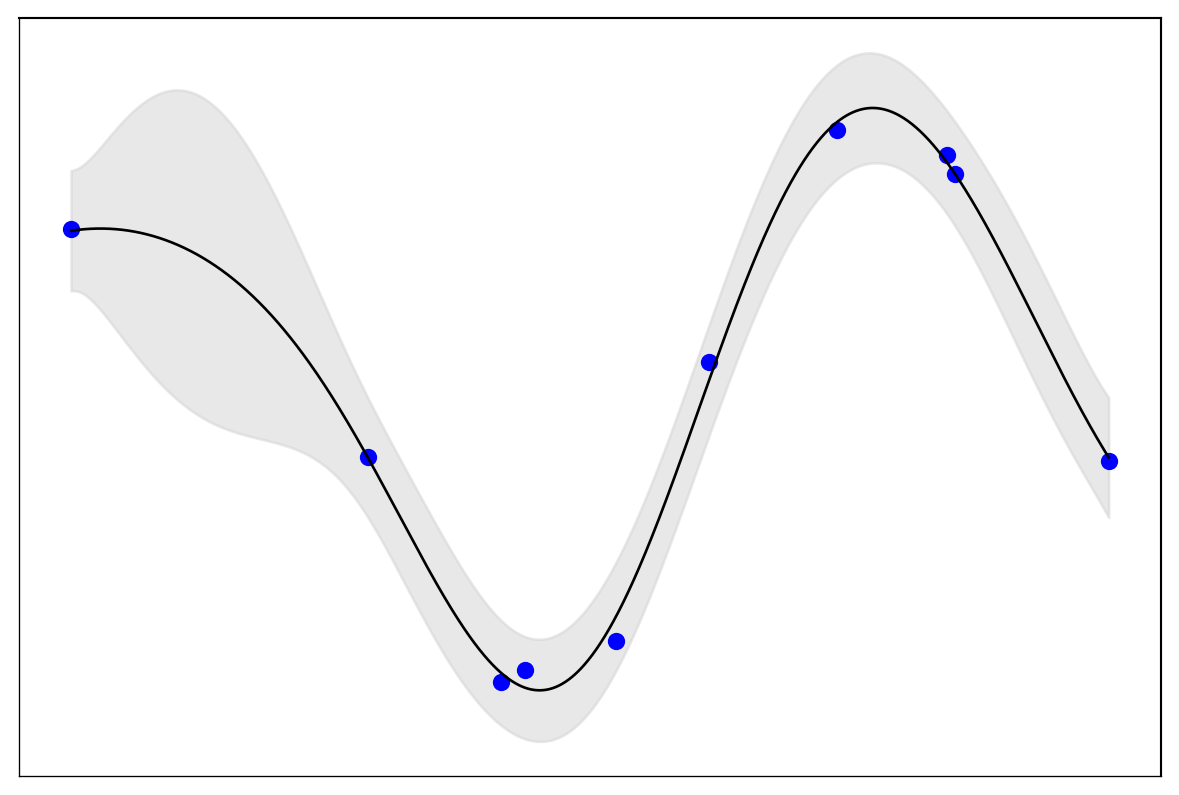

In [4]:
import numpy as np
import GPy
import matplotlib.pyplot as plt

kernel = GPy.kern.RBF(input_dim=1, variance=1.0)
model = GPy.models.GPRegression(x, y, kernel)
model.optimize()

xs = np.linspace(x.min(), x.max(), 1000)[:, None]
mu, var = model.predict(xs)

upper = mu + 1.96 * np.sqrt(var)
lower = mu - 1.96 * np.sqrt(var)

fig, ax = plt.subplots(figsize=(6, 4))  # グラフサイズを小さく

# 背景を白に
ax.set_facecolor('white')

# グラフ領域を削除
ax.patch.set_visible(False)

# 軸を細く
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# メモリを非表示
ax.tick_params(axis='both', which='both', length=0, labelleft=False, labelbottom=False, left=False, bottom=False)

# 軸ラベルを削除
ax.set_xlabel('')
ax.set_ylabel('')

# 凡例を非表示
ax.legend().set_visible(False)

# データプロット
ax.fill_between(xs[:, 0], lower[:, 0], upper[:, 0], color='lightgray', alpha=0.5)
ax.plot(xs[:, 0], mu[:, 0], color='k', lw=1)
ax.scatter(x[:, 0], y[:, 0], c='b', s=30)

plt.tight_layout(pad=0.2)
plt.show()

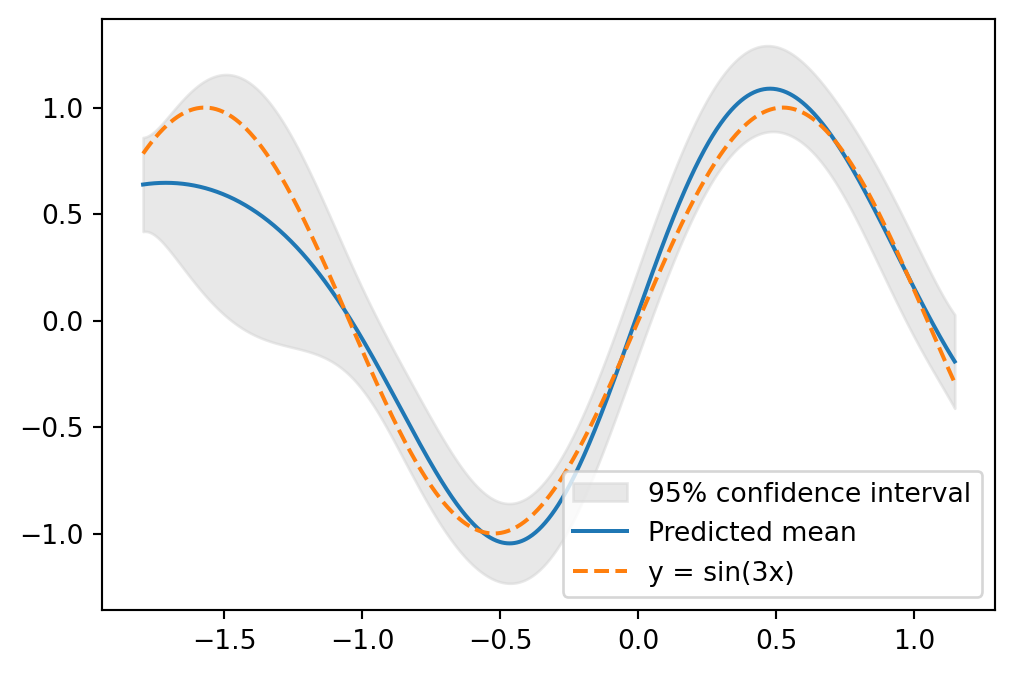

In [5]:
#| echo: false
plt.fill_between(xs[:,0], lower[:,0], upper[:,0], color='lightgray', label='95% confidence interval', alpha=0.5)
plt.plot(xs, mu, label='Predicted mean')
plt.plot(xs, np.sin(3*xs), '--', label='y = sin(3x)')
plt.legend()
plt.show()

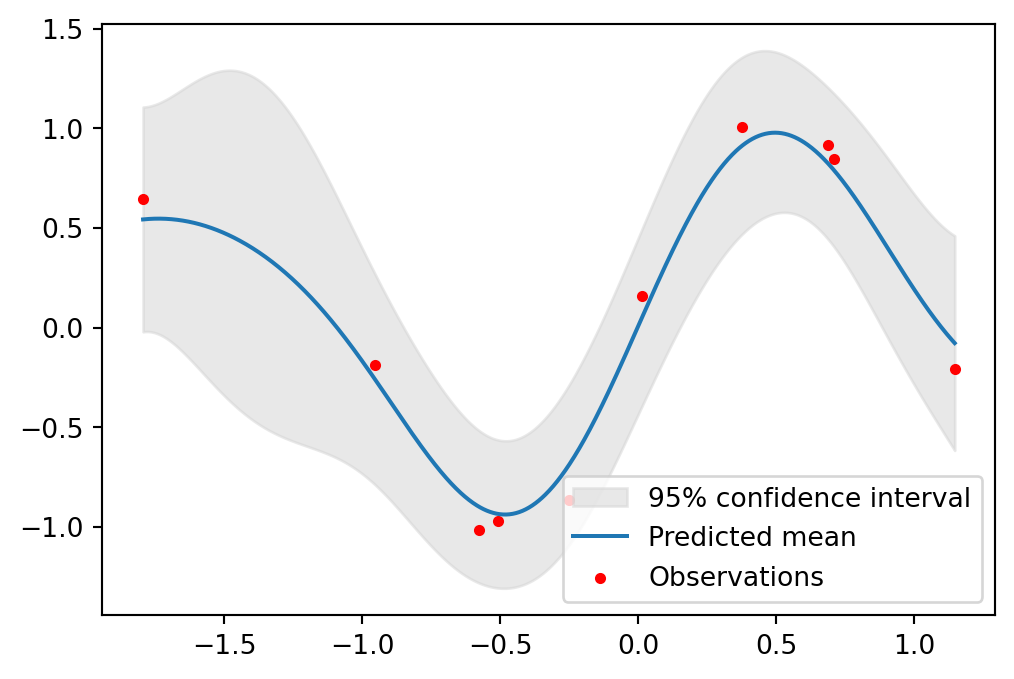

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
import matplotlib.pyplot as plt

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

# モデルの学習
gp.fit(x, y.ravel())

mu, s2 = gp.predict(xs, return_std=True)

# テスト点での平均と95%信頼区間のプロット
plt.fill_between(xs.ravel(), mu - 1.96 * s2, mu + 1.96 * s2, color='lightgray', label='95% confidence interval', alpha=0.5)
plt.plot(xs, mu, label='Predicted mean')
plt.scatter(x, y, c='r', label='Observations', s=10)
plt.legend()
plt.show()

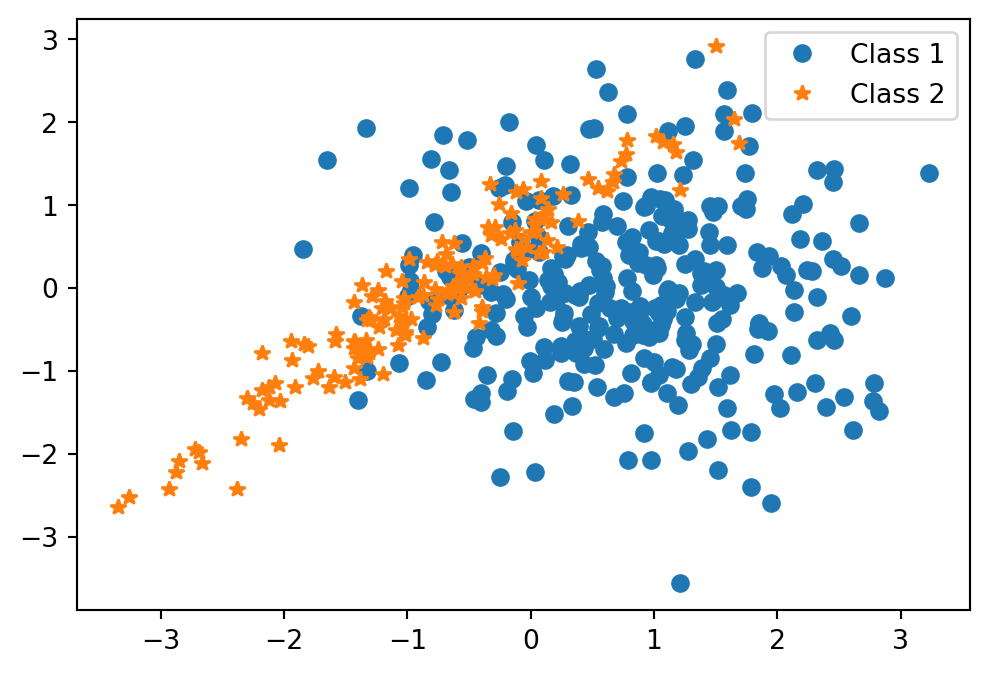

In [7]:
#| label: fig-gp-classification-true
n1, n2 = 320, 160
S1 = np.eye(2)
S2 = np.array([[1, 0.95], [0.95, 1]])
m1 = np.array([0.75, 0])
m2 = np.array([-0.75, 0])

x1 = np.random.multivariate_normal(m1, S1, n1)
x2 = np.random.multivariate_normal(m2, S2, n2)

x = np.vstack((x1, x2))

y1 = -np.ones(n1)
y2 = np.ones(n2)   # <1>
y = np.concatenate((y1, y2)).reshape(-1,1)

plt.plot(x1[:, 0], x1[:, 1], 'o', label='Class 1')
plt.plot(x2[:, 0], x2[:, 1], '*', label='Class 2')
plt.legend()
plt.show()

In [8]:
t1, t2 = np.meshgrid(np.arange(-4, 4.1, 0.1), np.arange(-4, 4.1, 0.1))
t = np.column_stack([t1.flat, t2.flat])

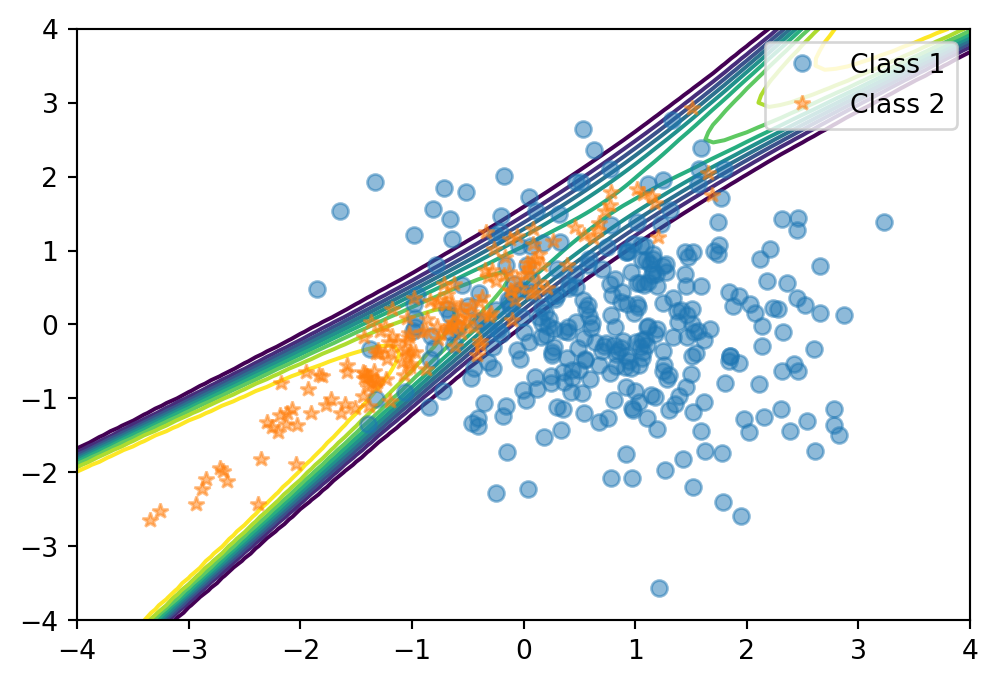

In [9]:
invS1 = np.linalg.inv(S1)
invS2 = np.linalg.inv(S2)
detS1 = np.linalg.det(S1)
detS2 = np.linalg.det(S2)

tmm1 = t - m1
p1 = n1 * np.exp(-0.5 * np.sum(tmm1.dot(invS1) * tmm1, axis=1)) / np.sqrt(detS1)

tmm2 = t - m2
p2 = n2 * np.exp(-0.5 * np.sum(tmm2.dot(invS2) * tmm2, axis=1)) / np.sqrt(detS2)

posterior = p2 / (p1 + p2)

# 等確率等高線のプロット
contour_levels = np.arange(0.1, 1, 0.1)
plt.contour(t1, t2, posterior.reshape(t1.shape), levels=contour_levels)

# データポイントのプロット
plt.plot(x1[:, 0], x1[:, 1], 'o', label='Class 1', alpha=0.5)
plt.plot(x2[:, 0], x2[:, 1], '*', label='Class 2', alpha=0.5)
plt.legend()
plt.show()

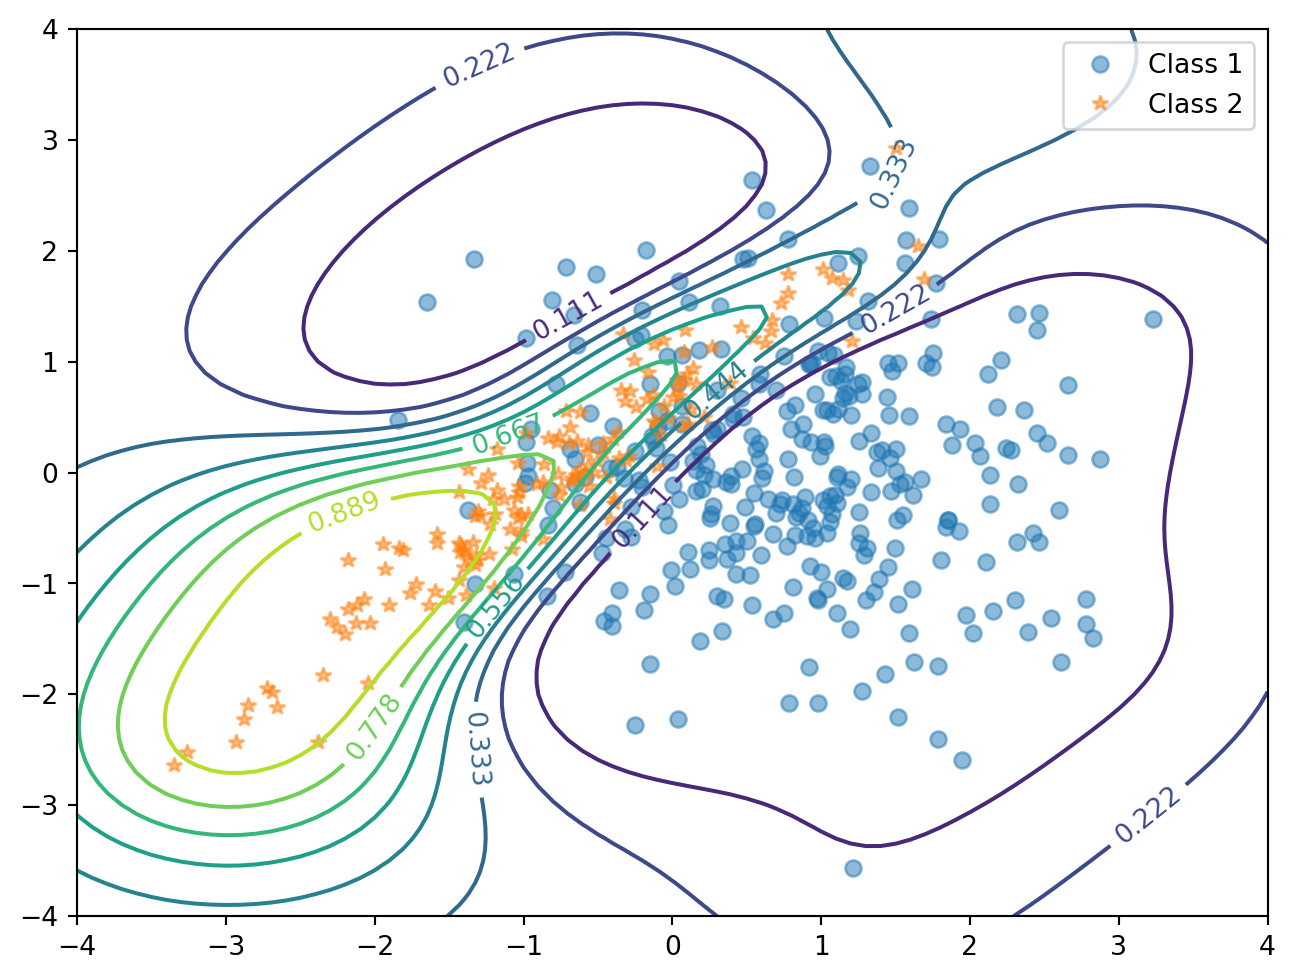

実行時間: 14.3 秒


In [10]:
import time

start_time = time.time()

meanfunc = GPy.mappings.Constant(2,1)
kernel = GPy.kern.RBF(input_dim=2, ARD=True)

model = GPy.models.GPClassification(x, y, kernel=kernel, mean_function=meanfunc)
model.optimize()

# テストデータセットに対する予済分布の計算
y_pred, _ = model.predict(t)

end_time = time.time()

# 予測確率の等高線プロット
plt.figure(figsize=(8, 6))
plt.plot(x1[:,0], x1[:,1], 'o', label='Class 1', alpha=0.5)
plt.plot(x2[:,0], x2[:,1], '*', label='Class 2', alpha=0.5)
contour = plt.contour(t1, t2, y_pred.reshape(t1.shape), levels=np.linspace(0, 1, 10))
plt.clabel(contour, inline=1, fontsize=10)
plt.legend()
plt.show()

elapsed_time = end_time - start_time
print(f"実行時間: {elapsed_time:.1f} 秒")